In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf
import json

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
data = az.from_netcdf("ar_Xeff_Xp.cdf")
#data = az.from_netcdf("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_lnm1_q.cdf")
az.summary(data,["ar_Xeff_std",
                 "ar_Xeff_tau",
                 "ar_Xp_std",
                 "ar_Xp_tau",
                 "logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "nEff_inj_per_event",
                 "min_log_neff"])

arviz - WARNING - Shape validation failed: input_shape: (1, 200), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ar_Xeff_std,1.229,0.230,0.781,1.629,0.015,0.010,246.0,67.0,NaN
ar_Xeff_tau,0.712,0.311,0.224,1.315,0.020,0.014,229.0,225.0,NaN
ar_Xp_std,0.939,0.324,0.285,1.553,0.024,0.017,188.0,149.0,NaN
ar_Xp_tau,1.150,0.466,0.345,1.863,0.030,0.022,258.0,179.0,NaN
logR20,-1.579,0.583,-2.853,-0.689,0.041,0.030,203.0,116.0,NaN
alpha,-3.874,0.337,-4.435,-3.148,0.042,0.031,81.0,71.0,NaN
mMin,9.207,0.921,7.577,10.677,0.054,0.038,259.0,182.0,NaN
log_dmMin,-0.408,0.380,-0.999,0.205,0.020,0.018,343.0,83.0,NaN
mu_m1,33.210,3.167,24.840,37.408,0.740,0.531,40.0,29.0,NaN
sig_m1,5.053,2.590,3.001,10.951,0.584,0.448,40.0,21.0,NaN


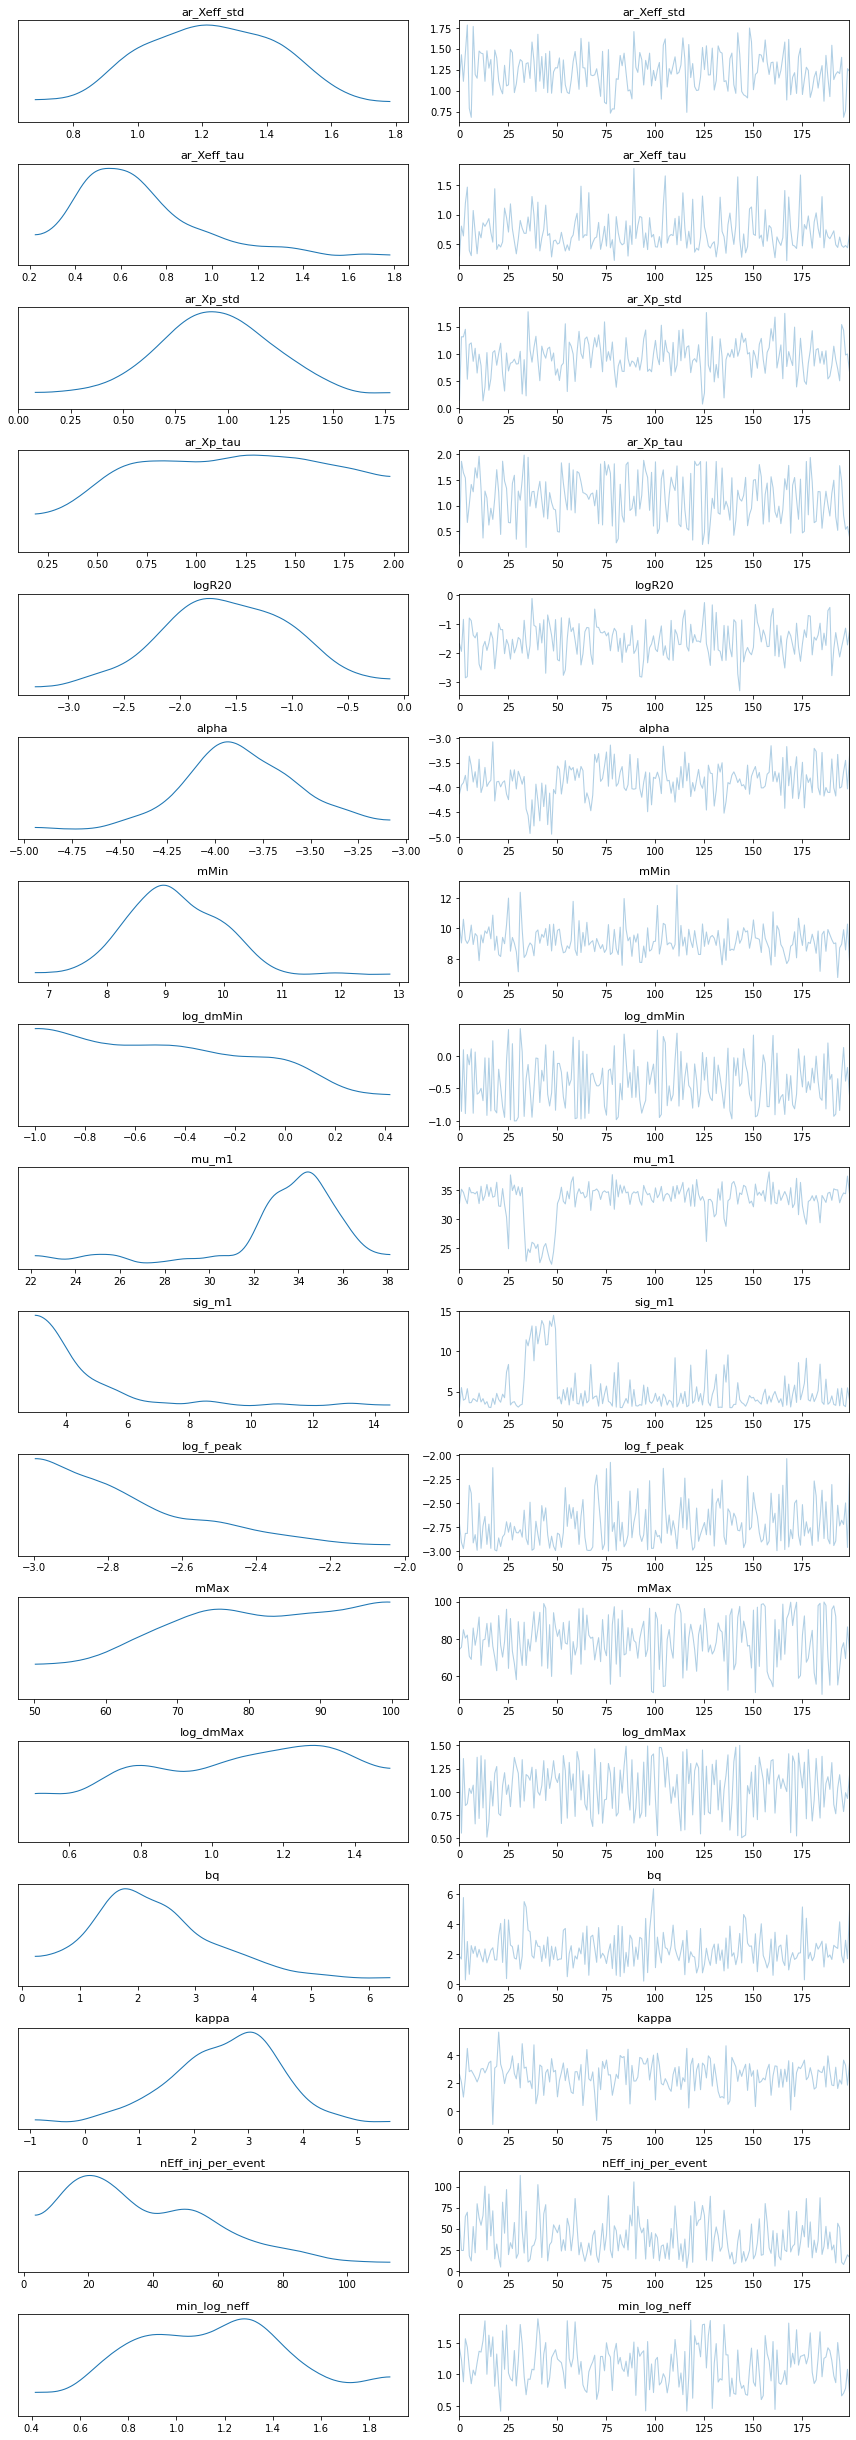

In [3]:
az.plot_trace(data,
              ["ar_Xeff_std",
                 "ar_Xeff_tau",
                 "ar_Xp_std",
                 "ar_Xp_tau",
                 "logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "nEff_inj_per_event",
                 "min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [4]:
Xeff_data = np.load('ar_Xeff_Xp_data.npy',allow_pickle=True)[()]
#lnm1_q_data = np.load('/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_lnm1_q_data.npy',allow_pickle=True)[()]
Xeff_values = Xeff_data['Xeff_allSamples']
Xp_values = Xeff_data['Xp_allSamples']

In [5]:
samps = data.posterior.stack(draws=("chain", "draw"))

In [6]:
with open('gaussian-spin-xeff-xp-ppd-data.json','r') as jf:
    test1 = json.load(jf)
    
#print(np.array(test['chi_eff_grid']).shape,np.array(test['chi_eff_pdfs']).shape)

with open('default-spin-xeff-xp-ppd-data.json','r') as jf:
    test2 = json.load(jf)

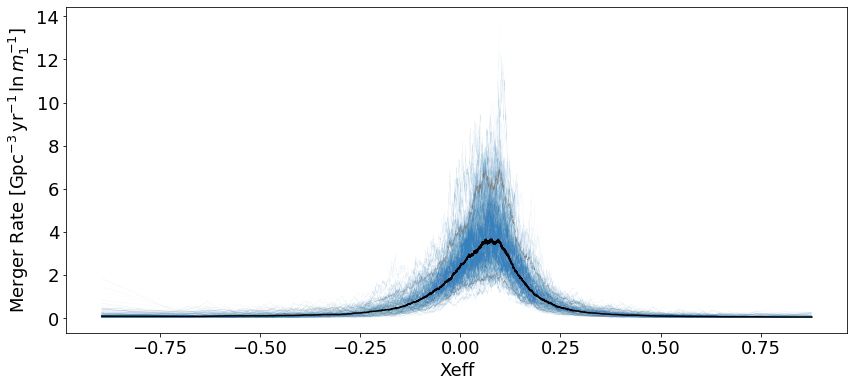

In [7]:
reduced_Xeffs = Xeff_values[::50]
reduced_f_Xeffs = samps['f_Xeffs'][::50]

R_Xeffs = np.zeros((reduced_Xeffs.size,reduced_f_Xeffs.shape[1]))
for i in range(reduced_f_Xeffs.shape[1]):
    R_Xeffs[:,i] = reduced_f_Xeffs[:,i]/np.trapz(reduced_f_Xeffs[:,i],reduced_Xeffs)

fig,ax = plt.subplots(figsize=(14,6))
for i in np.random.choice(range(reduced_f_Xeffs.shape[1]),500):
    ax.plot(reduced_Xeffs,R_Xeffs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_Xeffs,np.median(R_Xeffs,axis=1),color='black')
ax.plot(reduced_Xeffs,np.quantile(R_Xeffs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_Xeffs,np.quantile(R_Xeffs,0.95,axis=1),color='grey',lw=0.15)

"""ax.plot(test1['chi_eff_grid'],np.quantile(np.array(test1['chi_eff_pdfs']),0.05,axis=0),color='black',ls=':')
ax.plot(test1['chi_eff_grid'],np.median(np.array(test1['chi_eff_pdfs']),axis=0),color='black',ls=':')
ax.plot(test1['chi_eff_grid'],np.quantile(np.array(test1['chi_eff_pdfs']),0.95,axis=0),color='black',ls=':')

ax.plot(test2['chi_eff_grid'],np.quantile(np.array(test2['chi_eff_pdfs']),0.05,axis=1),color='black')
ax.plot(test2['chi_eff_grid'],np.median(np.array(test2['chi_eff_pdfs']),axis=1),color='black')
ax.plot(test2['chi_eff_grid'],np.quantile(np.array(test2['chi_eff_pdfs']),0.95,axis=1),color='black')"""

ax.tick_params(labelsize=18)
#ax.set_xlim(0,1.5)
#ax.set_ylim(0,3)
#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_xticks([10,30,100])
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel('Xeff',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

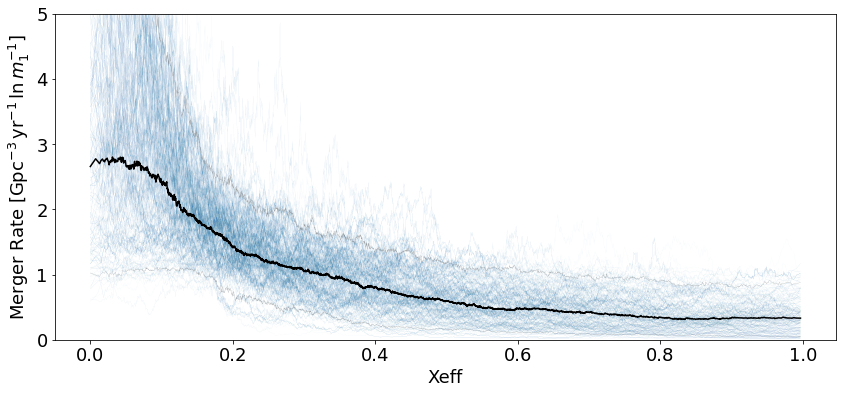

In [8]:
reduced_Xps = Xp_values[::50]
reduced_f_Xps = samps['f_Xps'][::50]

R_Xps = np.zeros((reduced_Xps.size,reduced_f_Xps.shape[1]))
for i in range(reduced_f_Xps.shape[1]):
    R_Xps[:,i] = reduced_f_Xps[:,i]/np.trapz(reduced_f_Xps[:,i],reduced_Xps)

fig,ax = plt.subplots(figsize=(14,6))
for i in np.random.choice(range(reduced_f_Xps.shape[1]),500):
    ax.plot(reduced_Xps,R_Xps[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_Xps,np.median(R_Xps,axis=1),color='black')
ax.plot(reduced_Xps,np.quantile(R_Xps,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_Xps,np.quantile(R_Xps,0.95,axis=1),color='grey',lw=0.15)

#ax.plot(test1['chi_p_grid'],np.quantile(np.array(test1['chi_p_pdfs']),0.05,axis=0),color='black',ls=':')
#ax.plot(test1['chi_p_grid'],np.median(np.array(test1['chi_p_pdfs']),axis=0),color='black',ls=':')
#ax.plot(test1['chi_p_grid'],np.quantile(np.array(test1['chi_p_pdfs']),0.95,axis=0),color='black',ls=':')

#ax.plot(test2['chi_p_grid'],np.quantile(np.array(test2['chi_p_pdfs']),0.05,axis=1),color='black')
#ax.plot(test2['chi_p_grid'],np.median(np.array(test2['chi_p_pdfs']),axis=1),color='black')
#ax.plot(test2['chi_p_grid'],np.quantile(np.array(test2['chi_p_pdfs']),0.95,axis=1),color='black')

ax.tick_params(labelsize=18)
#ax.set_xlim(0,1.5)
ax.set_ylim(0,5)
#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_xticks([10,30,100])
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_xlabel('Xeff',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}$]',fontsize=18)

plt.show()

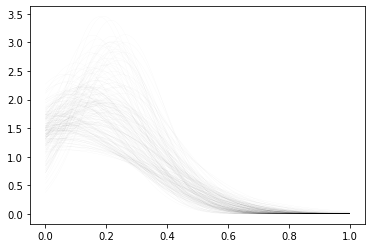

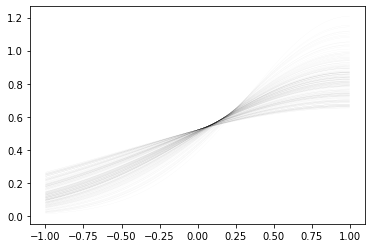

In [7]:
def gaussian(samples,mu,sigma,lowCutoff,highCutoff):
    
    """
    Function defining the probability density due to a truncated Gaussian
    """
    
    a = (lowCutoff-mu)/np.sqrt(2*sigma**2)
    b = (highCutoff-mu)/np.sqrt(2*sigma**2)
    norm = np.sqrt(sigma**2*np.pi/2)*(-erf(a) + erf(b))
    return np.exp(-(samples-mu)**2/(2.*sigma**2))/norm

fig,ax = plt.subplots()
grid = np.linspace(0,1,1000)
for i in range(samps.mu_chi.size):
    
    p_chi = gaussian(grid,samps.mu_chi.values[i],10.**samps.logsig_chi.values[i],-1,1)
    ax.plot(grid,p_chi,color='black',lw=0.1,alpha=0.1)
plt.show()

fig,ax = plt.subplots()
grid = np.linspace(-1,1,1000)
for i in range(samps.mu_chi.size):
    
    #p_cost = gaussian(grid,samps.mu_cost.values[i],samps.sig_cost.values[i],-1,1)
    p_cost = gaussian(grid,1.,samps.sig_cost.values[i],-1,1)

    ax.plot(grid,p_cost,color='black',lw=0.1,alpha=0.1)
plt.show()